### Import Necessary Variables

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs 
from sklearn.decomposition import PCA

In [19]:
df = pd.read_csv('EastWestAirlines.csv')
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

### Handle Null values Data Preprocessing

###  1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary

In [20]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [21]:
df.shape

(3999, 12)

In [22]:
print("Null of the values before preprocessing")
df.isnull().sum()

Null of the values before preprocessing


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [23]:
numarical_columns = df.select_dtypes(include = np.number).columns
df[numarical_columns] = df[numarical_columns].apply(pd.to_numeric,errors = 'coerce')
print("Mean of data")
print(np.mean(df[numarical_columns]))

Mean of data
8125.0962532299745


In [24]:
columns_mean = df[numarical_columns].mean()
df[numarical_columns] = df[numarical_columns].fillna(columns_mean)
print("Filling the null values with the mean of particular columns")
df.isnull().sum()

Filling the null values with the mean of particular columns


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [25]:
df.isnull()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     False    False       False      False      False      False   
1     False    False       False      False      False      False   
2     False    False       False      False      False      False   
3     False    False       False      False      False      False   
4     False    False       False      False      False      False   
...     ...      ...         ...        ...        ...        ...   
3994  False    False       False      False      False      False   
3995  False    False       False      False      False      False   
3996  False    False       False      False      False      False   
3997  False    False       False      False      False      False   
3998  False    False       False      False      False      False   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0           False        False              False            False   
1           False        False              False            False   
2           False        False              False            False   
3           False        False              False            False   
4           False        False              False            False   
...           ...          ...                ...              ...   
3994        False        False              False            False   
3995        False        False              False            False   
3996        False        False              False            False   
3997        False        False              False            False   
3998        False        False              False            False   

      Days_since_enroll  Award?  
0                 False   False  
1                 False   False  
2                 False   False  
3                 False   False  
4                 False   False  
...                 ...     ...  
3994              False   False  
3995              False   False  
3996              False   False  
3997              False   False  
3998              False   False  

[3999 rows x 12 columns]

In [26]:
print("Null the values after the preprocessing")
df.isnull().sum()

Null the values after the preprocessing


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [27]:
print("East West Airlines data sets describe:")
df.describe()

East West Airlines data sets describe:


ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [28]:
print("East West Airlines information:")
df.info()

East West Airlines information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [29]:
print("East West Airlines group by values:")
df.groupby('Balance').size()

East West Airlines group by values:


Balance
0          1
50         1
68         1
148        1
199        1
          ..
1113394    1
1125076    1
1199220    1
1302051    1
1704838    1
Length: 3904, dtype: int64

### 2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

In [30]:
df['Balance_encoded'] = df['Balance'].astype('category').cat.codes
print("co-Variance=", df.drop('Balance', axis=1).cov()) 
print("Co-relations=", df.drop('Balance', axis=1).corr())

co-Variance=                             ID#     Qual_miles     cc1_miles  cc2_miles  \
ID#                1.347374e+06  -17398.566611   -358.757386   3.477607   
Qual_miles        -1.739857e+04  598555.682228      8.448910  -1.590456   
cc1_miles         -3.587574e+02       8.448910      1.895907  -0.013870   
cc2_miles          3.477607e+00      -1.590456     -0.013870   0.021801   
cc3_miles         -3.332955e+00      -1.174990      0.016279  -0.000178   
Bonus_miles       -5.691147e+06  579624.781500  27441.151726 -14.152346   
Bonus_trans       -1.637776e+03     376.891028      8.052463   0.091318   
Flight_miles_12mo -5.040661e+04  137333.402316     72.049207   2.191037   
Flight_trans_12   -2.293768e+02     422.600774      0.215879   0.015841   
Days_since_enroll -2.313207e+06   27660.360880    656.424929  -1.770747   
Award?            -9.973102e+01      35.592142      0.223076   0.000380   
Balance_encoded   -3.546024e+05   87065.414830    752.380083  -2.101028   

           

### 3.Use multiple visualizations to understand the hidden patterns in the dataset

In [31]:
numerical_df = df.select_dtypes(include=np.number) 
z_scores = np.abs((numerical_df - numerical_df.mean()) / numerical_df.std())
df = df[(z_scores < 3).all(axis=1)]

In [32]:
numerical_features = df.select_dtypes(include=np.number).columns
df_numerical = df[numerical_features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

df_scaled = pd.DataFrame(df_scaled, columns=numerical_features, index=df.index)
df_final = df.drop(columns=numerical_features).merge(df_scaled, left_index=True, right_index=True)

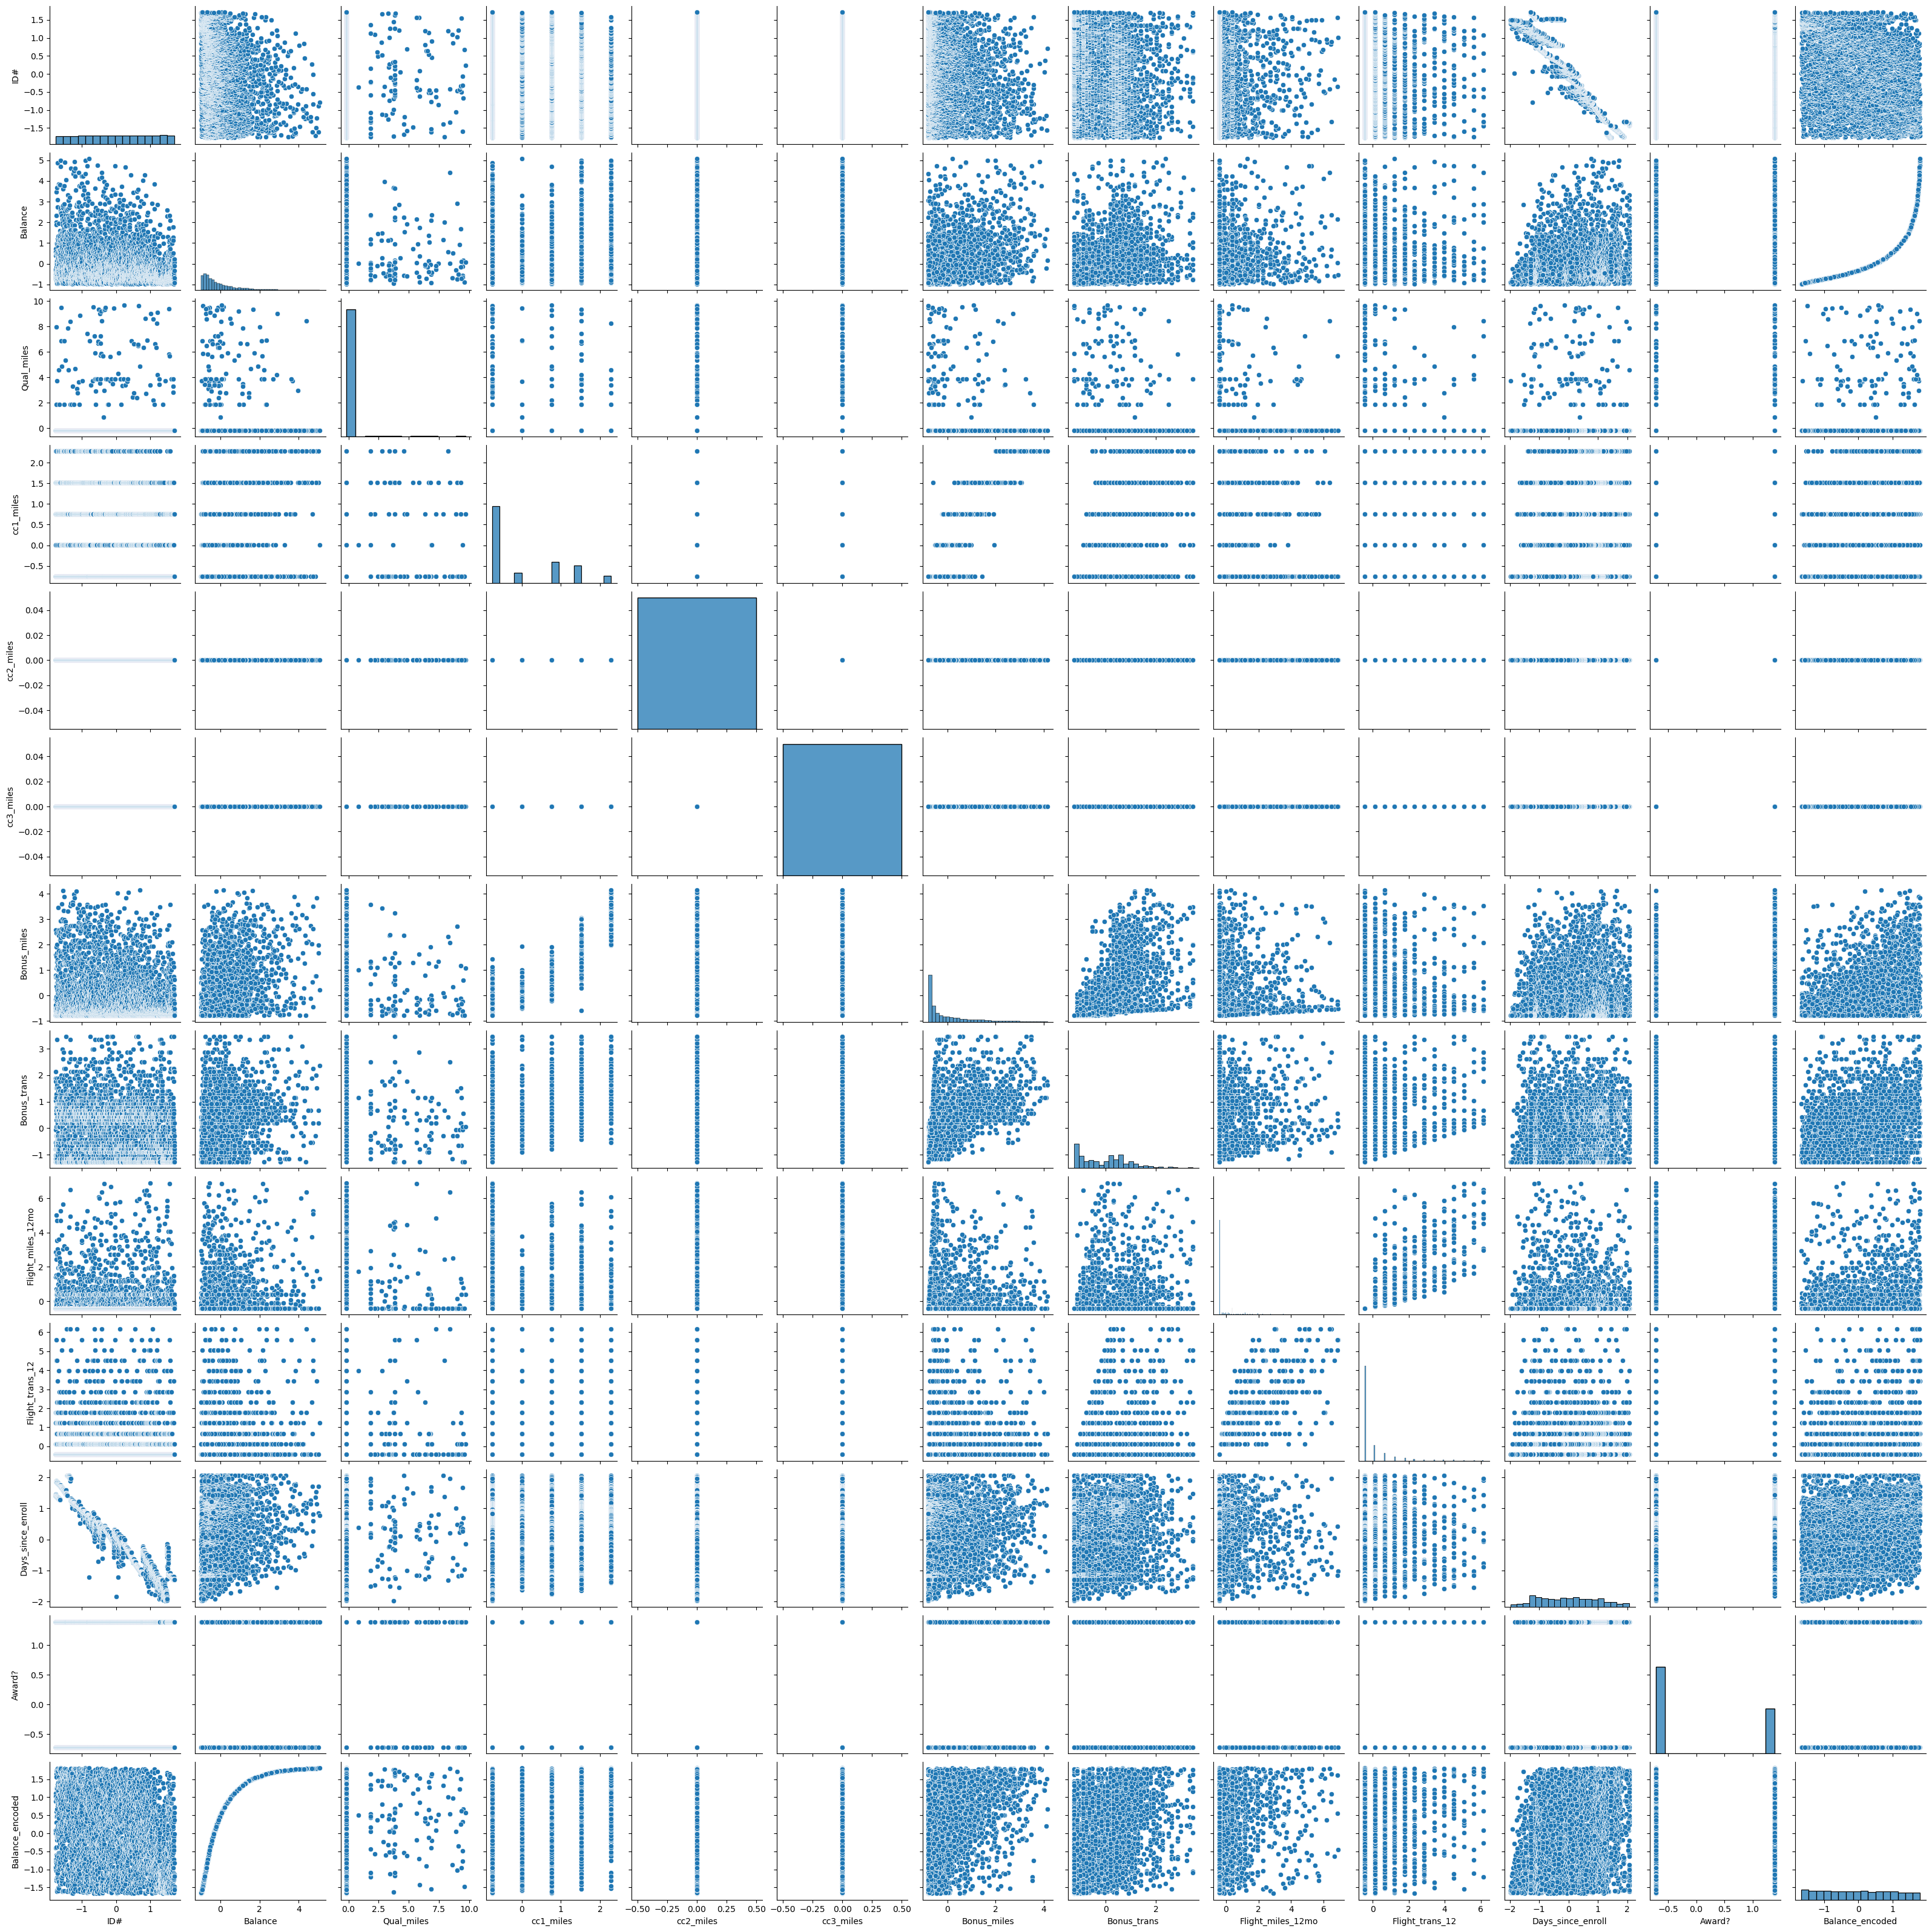

In [33]:
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))
plt.show()

### Implementing Clustering Algorithms:

### Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

In [34]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

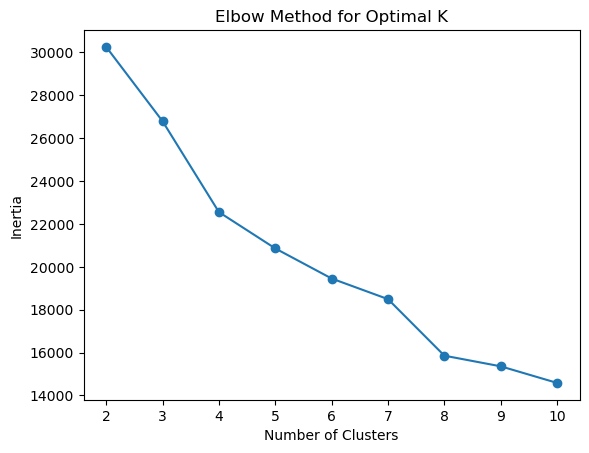

In [35]:
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [36]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

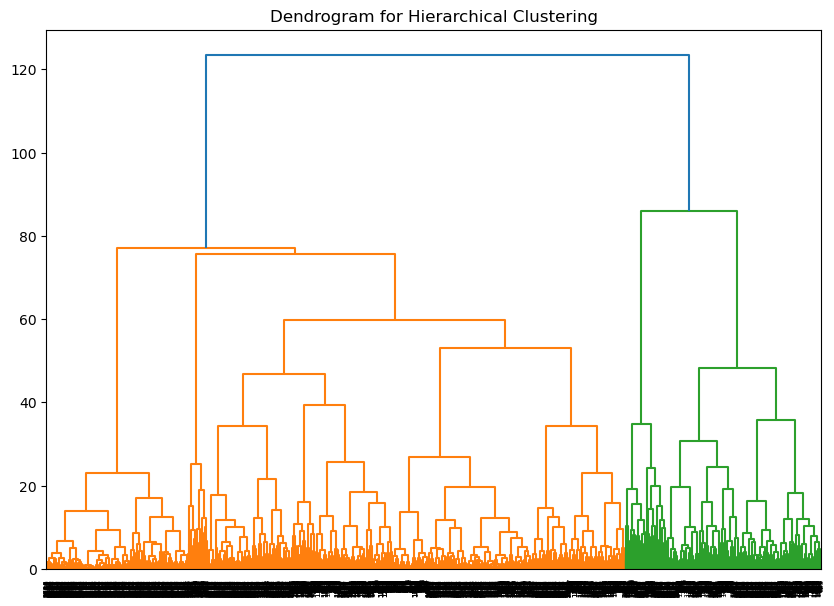

In [37]:
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

### Each clustering algorithm to the pre-processed dataset to identify clusters within the data

In [38]:
optimal_k = 4
Kmeans = KMeans(n_clusters = optimal_k,random_state = 42)
Kmeans_labels = Kmeans.fit_predict(df_scaled)

df['Days_since_enroll'] = Kmeans_labels 
print("Kmeans Cluster:",df['Days_since_enroll'].value_counts())

Kmeans Cluster: Days_since_enroll
1    1294
2    1092
0    1015
3     230
Name: count, dtype: int64


In [39]:
hc_labels = fcluster(linked,t = optimal_k,criterion = 'maxclust')
df['Days_since_enroll'] = hc_labels
print("Hierarchical Cluster :",df['Days_since_enroll'].value_counts())

Hierarchical Cluster : Days_since_enroll
2    2048
4     721
1     665
3     197
Name: count, dtype: int64


In [40]:
dbscan = DBSCAN(eps = 0.8,min_samples = 5)
dbscan_labels = dbscan.fit_predict(df_scaled)

df['Days_since_enroll'] = dbscan_labels
print("DBSCAN :", df['Days_since_enroll'].value_counts())

DBSCAN : Days_since_enroll
 0     1858
-1     1145
 1      416
 2      108
 5       17
 8       11
 13      10
 10       7
 7        6
 6        6
 4        6
 9        6
 11       6
 17       6
 3        5
 14       5
 16       5
 12       4
 15       4
Name: count, dtype: int64


### clustering algorithm to the pre-processed dataset to identify clusters within the data.

In [41]:
pd.Series(Kmeans_labels).value_counts() 
print('Kmeans cluster:', pd.Series(Kmeans_labels).value_counts())

Kmeans cluster: 1    1294
2    1092
0    1015
3     230
Name: count, dtype: int64


In [42]:
Kmeans.cluster_centers_

array([[-0.3500347 ,  0.77451601, -0.02000361,  1.27662963,  0.        ,
         0.        ,  1.16900359,  0.85047588, -0.14127115, -0.14547922,
         0.35759442,  0.41062695,  0.84319997],
       [ 0.96109399, -0.48031575, -0.0642149 , -0.54961341,  0.        ,
         0.        , -0.52754032, -0.45762588, -0.26950894, -0.26464441,
        -0.95567428, -0.31391805, -0.54793069],
       [-0.80437957, -0.28471003, -0.00451183, -0.54340274,  0.        ,
         0.        , -0.52602001, -0.3994211 , -0.2135717 , -0.20446397,
         0.78463127, -0.13860419, -0.25987029],
       [-0.04342571,  0.63607905,  0.47097678,  0.03833248,  0.        ,
         0.        ,  0.30657556,  0.71783788,  3.15371772,  3.101678  ,
         0.07333403,  0.61208425,  0.59544651]])

In [43]:
df['KMeans_Cluster'] = kmeans_labels
cluster_summary = df.groupby('KMeans_Cluster').mean()
print(cluster_summary)

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1638.215764  108693.471921   34.590148   3.681773        1.0   
1               3153.995363   30784.993818   23.575734   1.272025        1.0   
2               1112.953297   42929.525641   38.449634   1.280220        1.0   
3               1992.682609  100098.365217  156.908696   2.047826        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  35493.574384    17.490640         166.159606   
1                     1.0   4736.272798     6.691654          84.480680   
2                     1.0   4763.835165     7.172161         120.108974   
3                     1.0  19858.282609    16.395652        2264.847826   

                Flight_trans_12  Days_since_enroll    Award?  Balanc

### Cluster Analysis and Interpretation:

### Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

In [44]:
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_scaled)

In [45]:
df_pca = pd.DataFrame(df_pca,columns = ['Balance','Balance_encoded'])
df_pca['KMeans_Cluster']= Kmeans_labels
df_pca['Hierarchical_Cluster'] = hc_labels
df_pca['DBSCAN_Cluster'] = dbscan_labels 

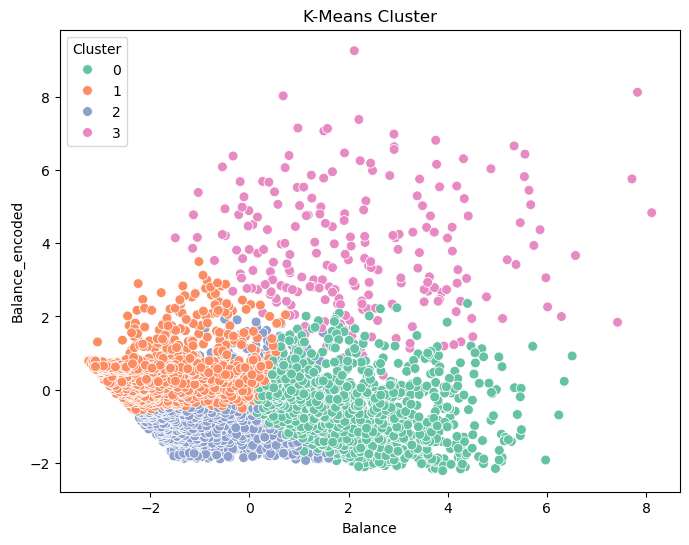

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Balance',y = 'Balance_encoded',hue = 'KMeans_Cluster',palette = 'Set2',data = df_pca,s = 50)
plt.title('K-Means Cluster')
plt.legend(title = 'Cluster')
plt.show()

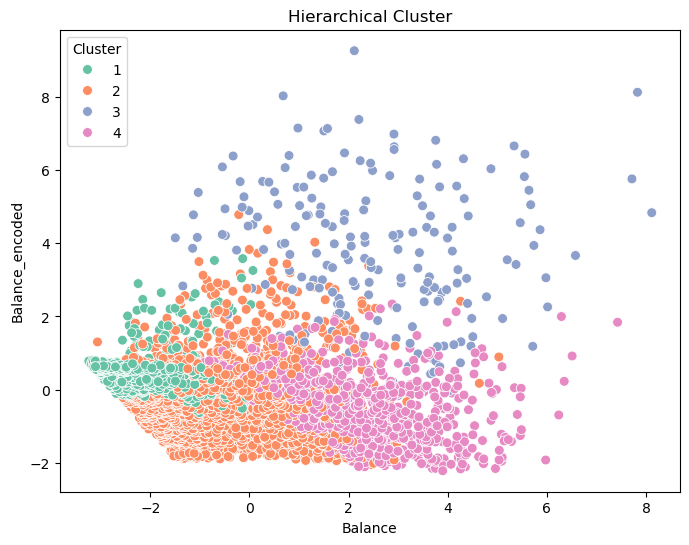

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Balance',y = 'Balance_encoded',hue = 'Hierarchical_Cluster',palette = 'Set2',data = df_pca,s = 50)
plt.title('Hierarchical Cluster')
plt.legend(title = 'Cluster')
plt.show()

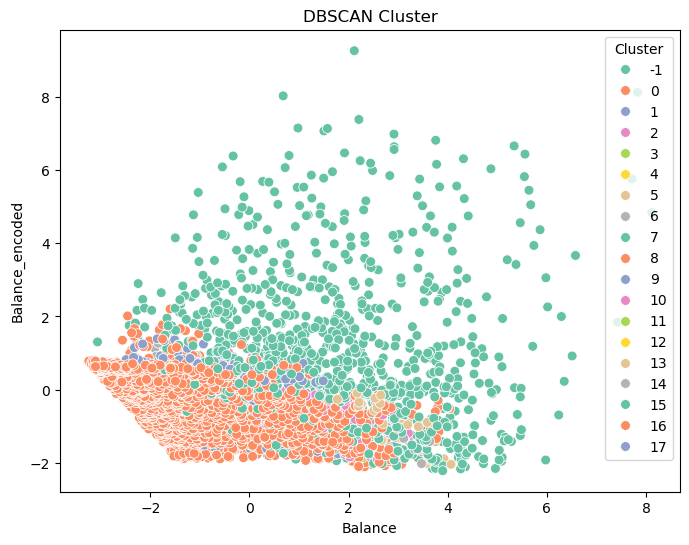

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Balance',y = 'Balance_encoded',hue = 'DBSCAN_Cluster',palette = 'Set2',data = df_pca,s = 50)
plt.title('DBSCAN Cluster')
plt.legend(title = 'Cluster')
plt.show()

# Visualization:
### Visualize the clustering results using scatter plots or other suitable visualization techniques.
### Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


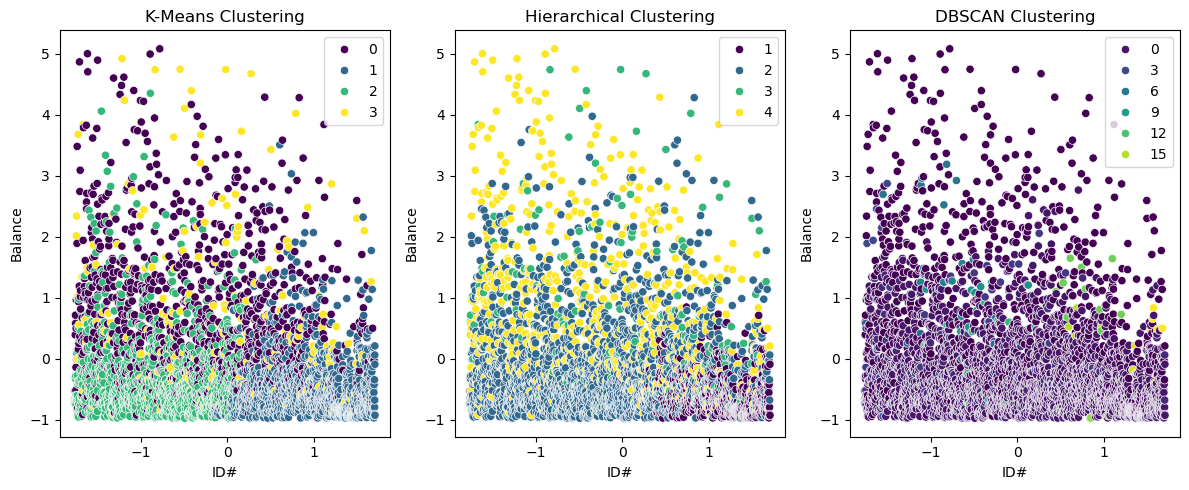

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=Kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=hc_labels, palette='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

# Evaluation and Performance Metrics:
### Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [50]:
print('K-Means Silhouette score :',silhouette_score(df_scaled,Kmeans_labels))
print('DBSCAN Silhouette score :',silhouette_score(df_scaled,dbscan_labels))

K-Means Silhouette score : 0.22190104690748988
DBSCAN Silhouette score : -0.2130266716668357
